### Table of Contents

* [Goals](#Goals)
* [Netflix](#Netflix)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Does Netflix focus more on TV shows or movies?](#section3_1)
    * [Content by country](#section3_2)
    * [Distribution of ratings](#section3_3)
    * [Releases by month](#section3_4)
    * [Content by genre](#section3_5)
* [Future analysis](#conclusion)

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import datetime as dt

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some data netflix. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Netflix <a class="anchor" id="Netflix"></a>

[Netflix](https://www.netflix.com/) is one of the most popular media and video streaming platforms. As of mid-2021, they have over 8000 movies or tv shows available on their platform and over 200M subscribers globally. 

#### Netflix through the years

<div>
<img src="timeline.jpg" width="700" align="left"/>
</div>

To do this analysis, I will use the Netflix colours brand when possible
https://www.onlinepalette.com/netflix/

Using a consistent color palette is a great way to give your work credibility. It looks professional, and keeps the reader engaged.

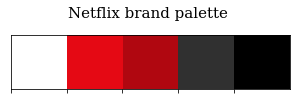

In [47]:
netflix_palette = ['#FFFFFF', '#E50914', '#B00710', '#303030', '#000000']
sns.palplot(netflix_palette)
plt.title("Netflix brand palette ",fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/shivamb/netflix-shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from these notebooks in Kaggle:
- [Netflix Visualizations, Recommendation, EDA](https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda)
- [Netflix Data Visualization](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization).

#### Loading the Data <a class="anchor" id="section1_2"></a>
The pandas library is used to import data from netflix.csv and preview the first five rows of the DataFrame.

In [48]:
netflix = pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Data Information <a class="anchor" id="section1_2"></a>

This tabular dataset consists of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Some immediate insights are:
* There are 12 columns and 8807 rows.
* Datypes: 1 column has integers and the others strings
* 6 of the 12 columns have missing data, numeric values that are strings and an extra spaces in the strings, so some cleaning will be necessary for this column prior to conducting EDA. 
* Some datypes will be changed to get insights about the data

In [49]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning <a class="anchor" id="cleaning"></a>

To perform the analysis, first, we need to prepare and clean the data. We wil:
* Fill missing data with "No data" in columns with strings
* Drop duplicate titles
* Convert the datatype of the column 'date_added' from string to datetime
* We will add a column name count to help us with some charts
* Separate 'duration' into two columns, one for TV shows (duration is presented in seasons) and one for movies (duration is presented in minutes).

In [50]:
#missing data
netflix['director'].fillna('No data', inplace = True)
netflix['cast'].fillna('No data', inplace = True)
netflix['country'].fillna('No data', inplace = True)
netflix['rating'].fillna('No data', inplace = True)

In [51]:
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [52]:
#drop duplicates
netflix.drop_duplicates(subset=('title'), inplace = True)

In [53]:
#change datatype date_added
netflix['date_added'] = netflix['date_added'].str.strip()
netflix['date_added']= pd.to_datetime(netflix['date_added'])

In [54]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.5+ KB


In [55]:
# Helper column for various plots
netflix['count'] = 1

In [56]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

Now that we have cleaned the data, let's explore Netflix's content

Interesting Insights

* Does Netflix focus more on TV shows or movies?
* Distribution of ratings
* Releases by month
* Content by genre

#### Does Netflix focus more on TV shows or movies?<a class="anchor" id="section3_1"></a>

First, let's take a general look at all the content available in the dataframe

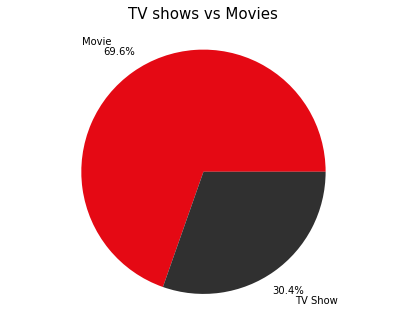

<Figure size 432x288 with 0 Axes>

In [117]:
palette_2c = ['#E50914', '#303030']
fig, ax = plt.subplots(figsize=(7, 5))
plt.pie(netflix['type'].value_counts(), colors = palette_2c, labels = netflix['type'].unique(), 
        autopct = '%.01f%%', pctdistance = 1.2, labeldistance = 1.3)
plt.axis('equal')
plt.title('TV shows vs Movies', fontsize = 15, y = 1.04)
plt.savefig("TV shows vs Movies.png")
plt.show()
plt.clf()

We can see that up until 2021, Netflix had more Movies than TV shows on the platform. Now, let's check that this is true also over the years

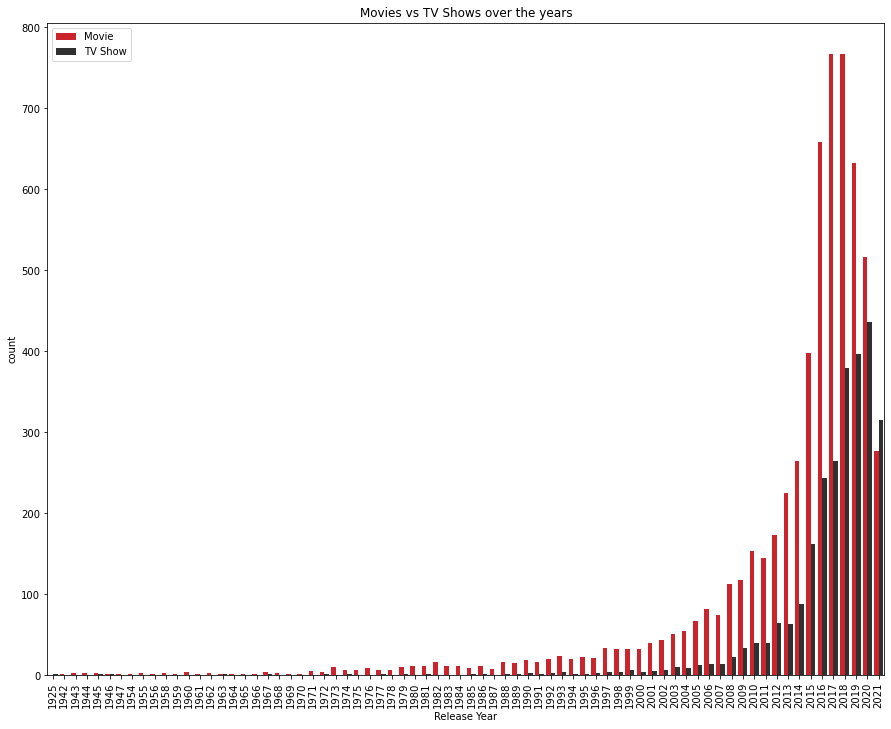

<Figure size 432x288 with 0 Axes>

In [58]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.countplot(data = netflix, x = 'release_year', hue = 'type', palette = palette_2c)
plt.xticks(rotation = 90)
plt.title('Movies vs TV Shows over the years')
plt.legend(loc='upper left')
plt.xlabel('Release Year')
plt.show()
plt.clf()

We can see Netflix started producing TV shows in 1990. Let's plot the chart starting at this year so we can see the difference between TV shows and Movies more clearly

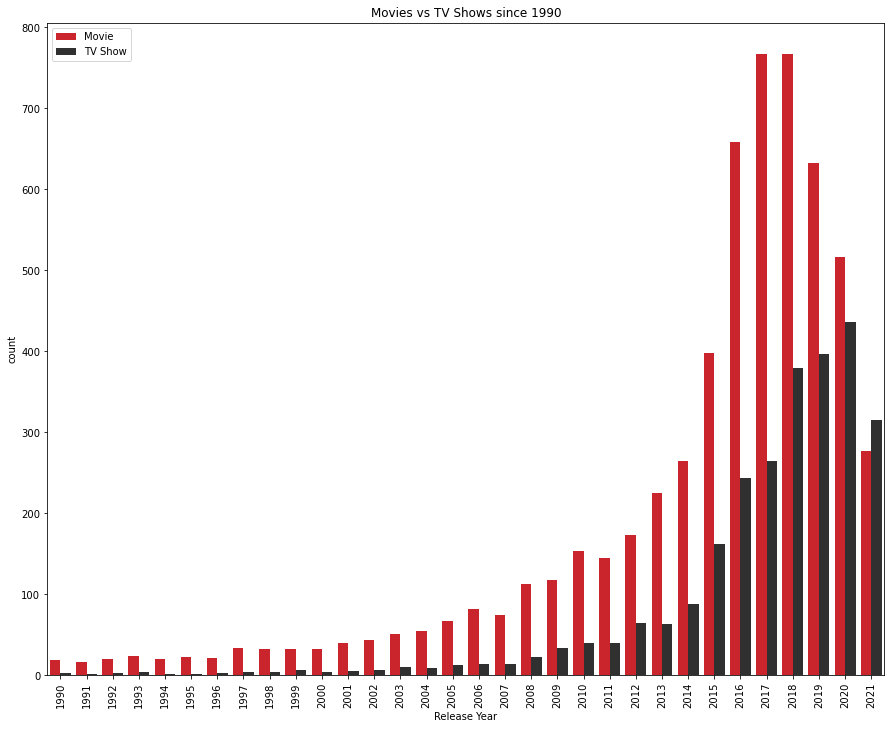

<Figure size 432x288 with 0 Axes>

In [118]:
netflix_1990 = netflix[netflix['release_year'] >= 1990]
fig, ax = plt.subplots(figsize=(15, 12))
sns.countplot(data = netflix_1990, x = 'release_year', hue = 'type', palette = palette_2c)
plt.xticks(rotation = 90)
plt.title('Movies vs TV Shows since 1990')
plt.legend(loc='upper left')
plt.xlabel('Release Year')
plt.savefig("Movies vs TV Shows since 1990.png")
plt.show()
plt.clf()

Although, in total Netflix still has more movies than TV shows, we can see the tendency starting to change in 2019, and in 2021, Netflix already released more TV shows than movies. 

#### Content by country<a class="anchor" id="section3_2"></a>

In this section, we will analyze:
- Which are the 10 countries which procude more content avaible in Netflix
- If the tendency, we have seen in the chart TV Shows vs Movies, is the same in every country

First, let's focus on finding out what countries provide more content to the platform. 

Some titles have more than one country listed. To do the analysis, we will take into consideration the first one mentioned. 

To achieve this, we will need to add a column showing the first country in each row.

In [60]:
netflix['first_country'] = netflix['country'].apply(lambda x: x.split(",")[0])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,United States
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,No data
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,No data
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,India


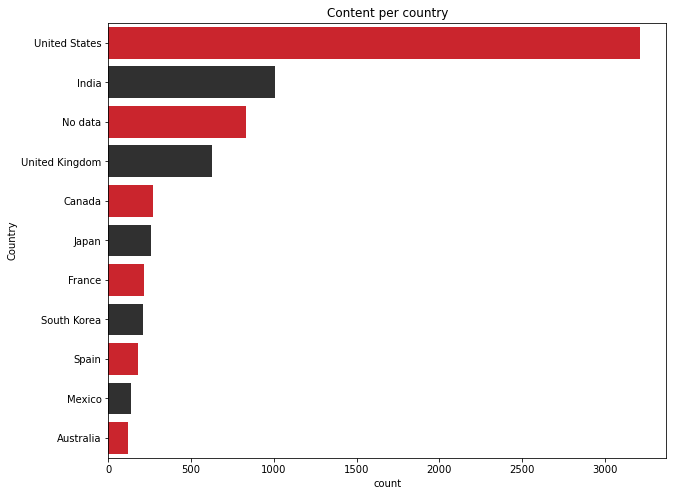

In [61]:
netflix_10_countries = pd.DataFrame(netflix.groupby('first_country')
                                    ['count'].sum().sort_values(ascending=False)[:11])

f, ax = plt.subplots(figsize= (10, 8))
sns.barplot(data = netflix_10_countries, x = 'count', y = netflix_10_countries.index, palette = palette_2c)
plt.title('Content per country')
plt.ylabel('Country')
plt.show()

It is not a surprise that USA is the top country producing content for Netflix, and possible to all other major platforms. Also, we can see that within the dataframe there is a lot of the titles with the country missing.

In [62]:
country_order = netflix['first_country'].value_counts()[:11].index
data_country_type = netflix[['type', 'first_country']].groupby('first_country')['type']\
.value_counts().unstack().loc[country_order]
data_country_type

type,Movie,TV Show
United States,2364.0,847.0
India,927.0,81.0
No data,440.0,391.0
United Kingdom,382.0,246.0
Canada,187.0,84.0
Japan,85.0,174.0
France,148.0,64.0
South Korea,47.0,164.0
Spain,129.0,52.0
Mexico,86.0,48.0


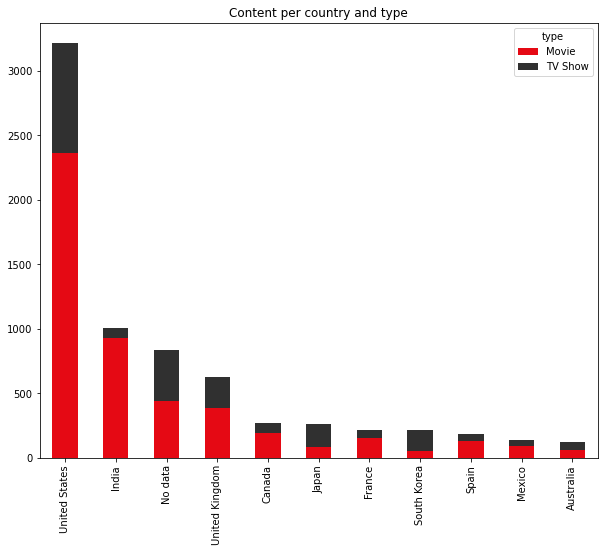

<Figure size 432x288 with 0 Axes>

In [119]:
ax = data_country_type.plot(kind = 'bar', figsize=(10,8), 
                               stacked=True, color = ['#E50914', '#303030'])
plt.title('Content per country and type')
plt.savefig("Content per country and type.png")
plt.show()
plt.clf()

Most of the countries produce more Movies than TV shows. The country following this trend with the biggest difference is India. However, there are 2 countries which had more TV shows than movies added to the Netflix platform, Japan and South Korea.  

#### Distribution of ratings<a class="anchor" id="section3_3"></a>

Most people don't know what the abbrevations for the ratings mean so first we will explain the concepts.

In [64]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'No data', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

* PG-13: Parents Strongly Cautioned. Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
* TV-MA: V-MA Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* PG: Parental Guidance Sugested. Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.
* TV-14: Parents Strongly Cautioned This program contains some material that many parents would find unsuitable for children under 14 years of age.
* TV-PG: Parental Guidance Suggested This program contains material that parents may find unsuitable for younger children.
* TV-Y: All Children This program is designed to be appropriate for all children. 
* TV-Y7: Directed to Older Children This program is designed for children age 7 and above.
* R: Restricted. Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them. 
* TV-G: General Audience Most parents would find this program suitable for all ages.
* G:General Audiences. All ages admitted. Nothing that would offend parents for viewing by children.
* NC-17: Adults only. No One 17 and Under Admitted. Clearly adult. Children are not admitted.
* NR:Not rated
* TV-Y7-FV: Directed to Older Children - Fantasy Violence
* UR:Unrated 

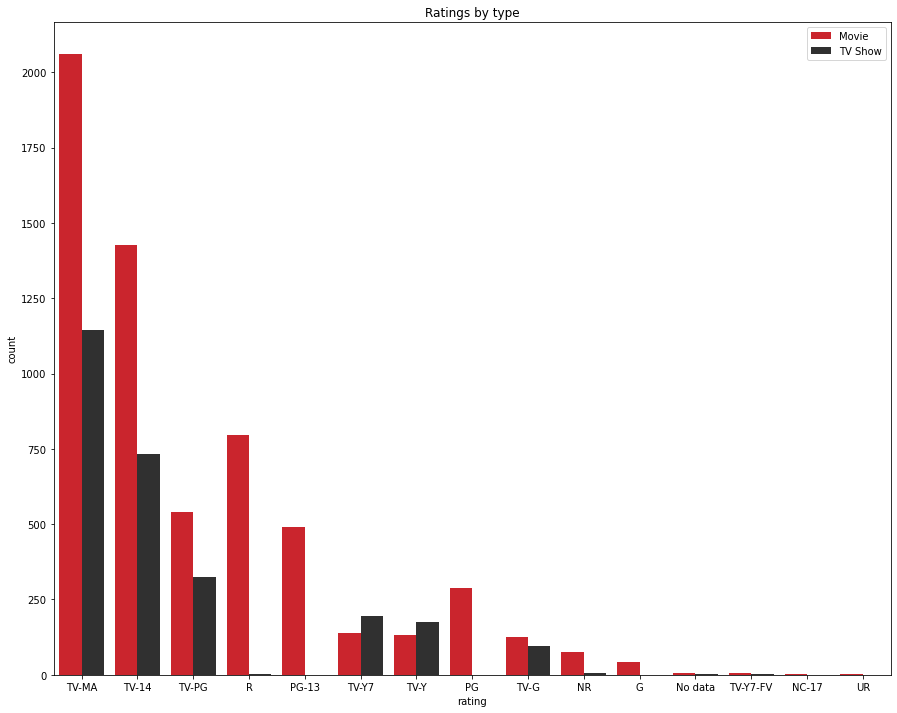

<Figure size 432x288 with 0 Axes>

In [65]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.countplot(data = netflix, x = 'rating', hue = 'type', palette = palette_2c, 
              order=netflix['rating'].value_counts().index[0:15])
plt.title('Ratings by type')
plt.legend(loc='upper right')
plt.show()
plt.clf()

The most common ratings are TV-MA (content for mature audiences) and TV-14 (unsuitable for children under 14 years of age). 

To make things easier and more clear, we could group the ratings by age group:
- Children: TV-Y, TV-G, G
- Older Children: PG, TV-PG,TV-Y7, TV-Y7-FV
- Teenagers: PG-13, TV-14 
- Adults: TV-MA, R, NC-17
- Not rated: NR, UR, No data

In [66]:
ratings_group = {'TV-Y': 'Children', 'TV-G' : 'Children', 'G' : 'Children', 'PG-13' : 'Teenagers', 
                 'PG' : 'Older Children', 'TV-14' : 'Teenagers', 'TV-PG' : 'Older Children', 'TV-Y7' : 'Older Children', 
                 'TV-Y7-FV' : 'Older Children', 'TV-MA' : 'Adults', 'R' : 'Adults', 'NC-17' : 'Adults',
                 'NR' : 'Not rated', 'UR' : 'Not rated', 'No data' : 'Not rated'}

netflix['ratings_group'] = netflix['rating'].replace(ratings_group)

In [67]:
netflix['ratings_group'].value_counts()

Adults            4009
Teenagers         2650
Older Children    1490
Children           568
Not rated           90
Name: ratings_group, dtype: int64

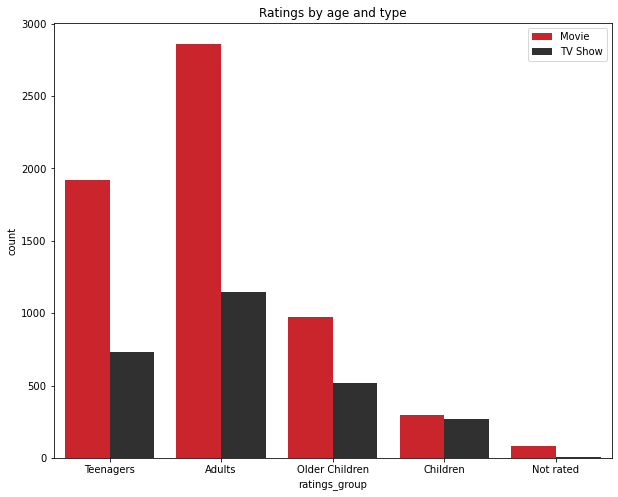

<Figure size 432x288 with 0 Axes>

In [120]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data = netflix, x = 'ratings_group', hue = 'type', palette = palette_2c)
plt.title('Ratings by age and type')
plt.legend(loc='upper right')
plt.savefig("Ratings by age and type.png")
plt.show()
plt.clf()

It is not surprising that most of the content is addressed to adults. However, it is interesting that as age decreases,the difference between the offer of movies and TV shows also decreases.

#### Releases by month<a class="anchor" id="section3_4"></a>

In this section, we will analyze which month are the most popular to release a movie or a tv show.

In [69]:
netflix['month'] = netflix['date_added'].dt.month.fillna(0).astype(int)
netflix['year'] = netflix['date_added'].dt.year.fillna(0).astype(int)

netflix_date = netflix[(netflix['month'] != 0) & (netflix['year'] != 0)]\
.groupby('month').year.value_counts().unstack().fillna(0)

netflix_date

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
2,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,125.0,173.0,172.0,137.0,112.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0


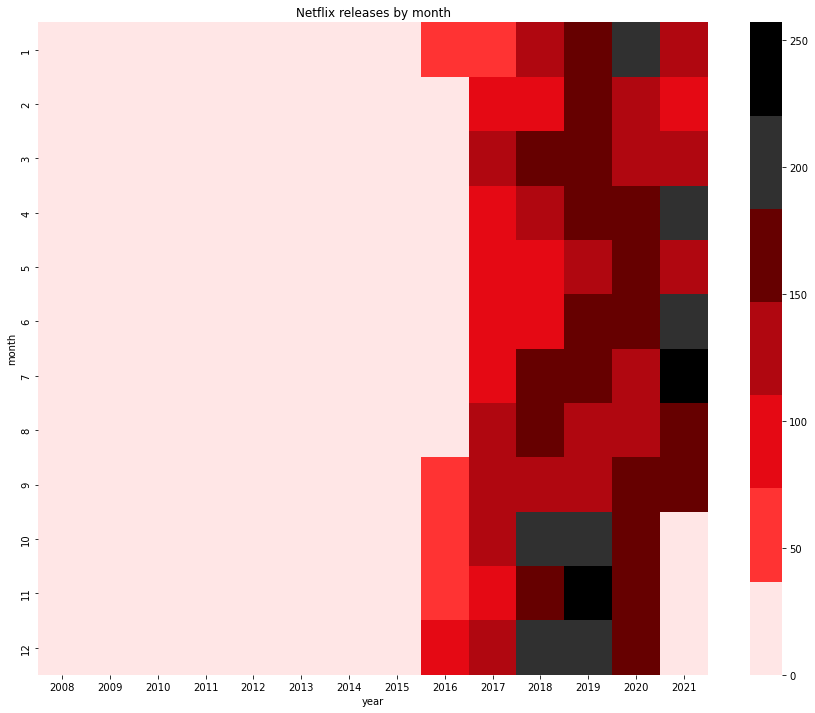

<Figure size 432x288 with 0 Axes>

In [121]:
net_pal_ext = ['#ffe6e6', '#ff3333', '#E50914', '#B00710','#660000', '#303030', '#000000']

fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(netflix_date, cmap = net_pal_ext)
plt.title('Netflix releases by month')
plt.savefig("Netflix releases by month.png")
plt.show()
plt.clf()

In general, according to the heatmap, from october to january are the months when more content is realease. However, the last 2 years, 2020 and 2021, we can see an increase in the content realeased during spring and early summer months.

#### Content by genre<a class="anchor" id="section3_5"></a>

Finally, our last chart will analyze the netfilz content by genre. 

In [114]:
from collections import Counter

genres_byrow = list(netflix['listed_in'])
genres = []

for genre in genres_byrow:
    genre = list(genre.split(','))
    for i in genre:
        genres.append(i.replace(' ',""))

g=Counter(genres)

genres_df = pd.DataFrame.from_dict(g, orient='index').reset_index()
genres_df = genres_df.rename(columns={'index':'genre', 0:'count'})
genres_df = genres_df.sort_values(by='count').reset_index()

genres_df

,index,genre,count
0,35,TVShows,16
1,41,Classic&CultTV,28
2,40,Stand-UpComedy&TalkShows,56
3,39,Movies,57
4,23,TVThrillers,57
5,36,Faith&Spirituality,65
6,33,TeenTVShows,69
7,34,CultMovies,71
8,28,AnimeFeatures,71
9,10,TVHorror,75


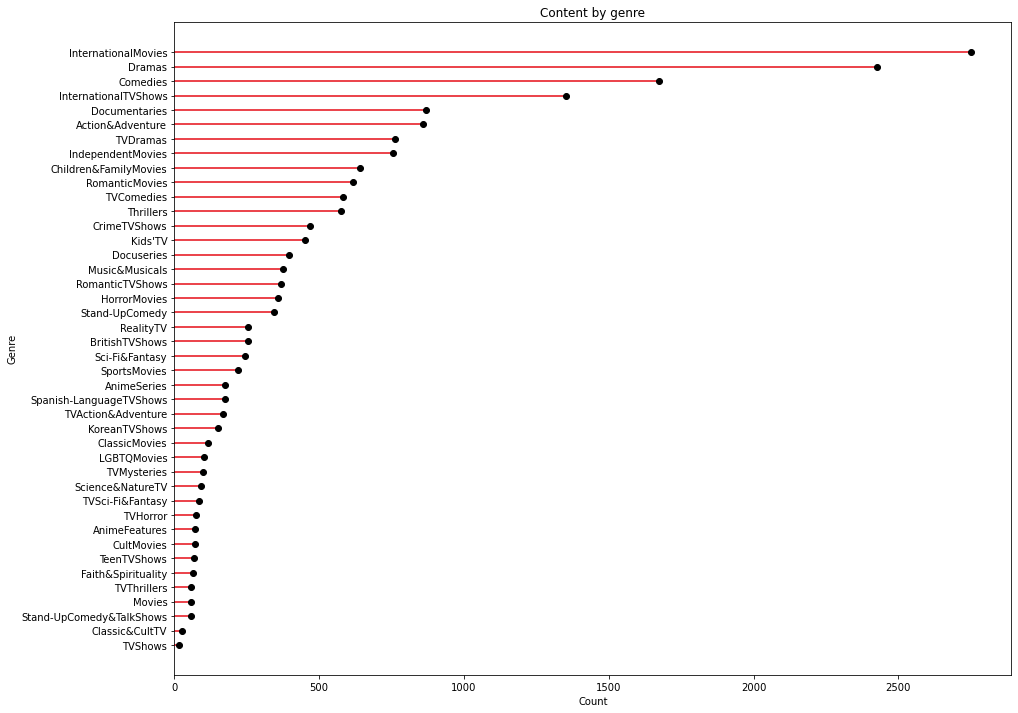

<Figure size 432x288 with 0 Axes>

In [122]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.hlines(y = genres_df['genre'], xmin = 0, xmax = genres_df['count'], color = '#E50914')
plt.plot(genres_df['count'], genres_df['genre'], "ok")
ax.set_xlim(0)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Content by genre')
plt.savefig("Content by genre.png")
plt.show()
plt.clf()

Most of the Netflix content is included withing the genres "International Movies", "Dramas" or "Comedies".

### Future analysis <a class="anchor" id="conclusion"></a>

We have focused the analyses on the different content available on Netflix. However, for future analysis, it will be interesting to do an analysis on the content focus on gender, for example, merging a dataset that included the Bechdel scores, gender of directors and main characters and profit of the movies. 